In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy.table import Table
import numpy as np
from scipy.interpolate import interp1d
import os

In [2]:
def read_txt(path):
    f=open(path)
    st=f.read()
    f.close()
    a=st.split('\n')
    x=[]
    x_err=[]
    y=[]
    y_err=[]
    for i in range(3,len(a)-1):
        b=a[i].split(' ')
        x.append(float(b[0]))
        x_err.append(float(b[1]))
        y.append(float(b[2]))
        y_err.append(float(b[3]))
    x=np.array(x)
    y=np.array(y)
    x_err=np.array(x_err)
    y_err=np.array(y_err)
    return x,x_err,y,y_err

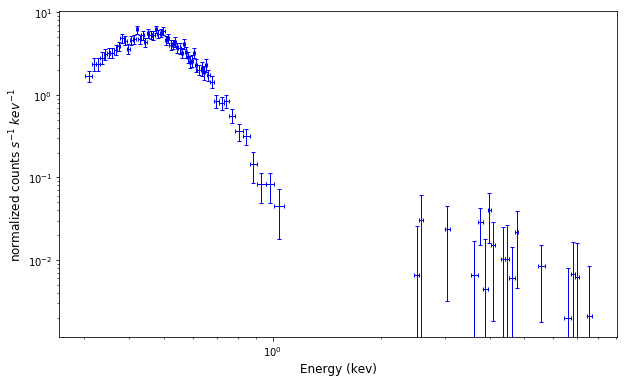

In [15]:
x,x_err,y,y_err=read_txt('spec_52.txt')

counts = []
for i in range(len(y)):
    cts = y[i]*4099440.1499995743*x[i]
    counts.append(cts)
counts = np.array(counts)

x_new = x[counts>5]
y_new = y[counts>5]
xerr_new = x_err[counts>5]
yerr_new = y_err[counts>5]
        


fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(111)
#ax.scatter(E,Count,c='blue',marker='o',s=3)
ax.errorbar(x_new,y_new, yerr=yerr_new, xerr=xerr_new, fmt=',', color='b', elinewidth=1, capsize=2)
ax.set_xlabel('Energy (kev)',fontsize=12)
ax.set_yscale('log')
ax.set_xscale('log')
#ax.set_ylim(10**(-2),10**3)
#ax.set_xlim(10**(-1),10**1)
ax.set_ylabel('normalized counts $s^{-1}$ $kev^{-1}$',fontsize=12)
plt.show()